In [48]:
%load_ext autoreload
%autoreload 2

from corr_study.agent.agent import *
from matplotlib import pyplot as plt
from corr_study.plot.linear import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [98]:
agent = Agent(10000, 10, 
              3, 8, ["Top CD", "Left CD", "Right CD"], ["None", "Top", "Left", "Right", "TopLeft", "TopRight", "LeftRight", "All"],
              [[0, 1000], [0, 1000], [0, 1000]], 
              10**(-4), 10**-8, 0, 0.9, 32, 1000, 2000 )
agent.load_data("agent_out_1e-5_full/")
agent.load_model("agent_out_1e-5_full/")

Load learning model from:  agent_out_1e-5/


/home/filo/thesis/pqos-correlation/corr_study/plot/linear.py:41: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=data, ax=ax, x='Time', y='Value', hue=data_hues, markers=True, dashes=False, ci=None, palette=palette)


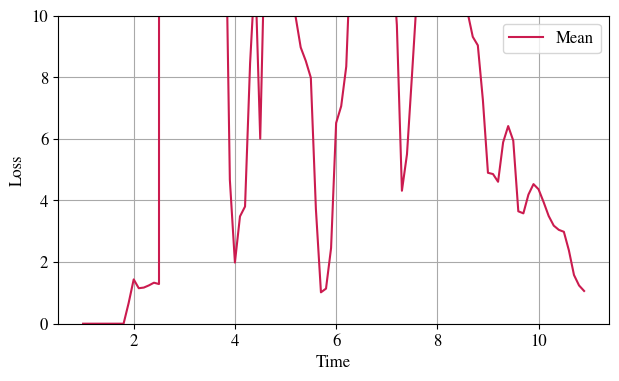

In [99]:
loss = agent.loss_data[:agent.data_idx+1]
linear_plot(loss,
            "Time",
            "Loss",
            10,
            "",
            "rocket",
            lim=[0,10])

In [100]:
actions = agent.action_data[:agent.data_idx+1]
print(actions.shape)
# linear_plot(loss,
#             "Time",
#             "Loss",
#             6,
#             "",
#             "rocket",
#             lim=[0,100])

(8, 27888)


/home/filo/thesis/pqos-correlation/corr_study/plot/linear.py:105: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=data, ax=ax, x='Time', y='Value', hue='Label', markers=True, dashes=False, ci=None, palette=palette)


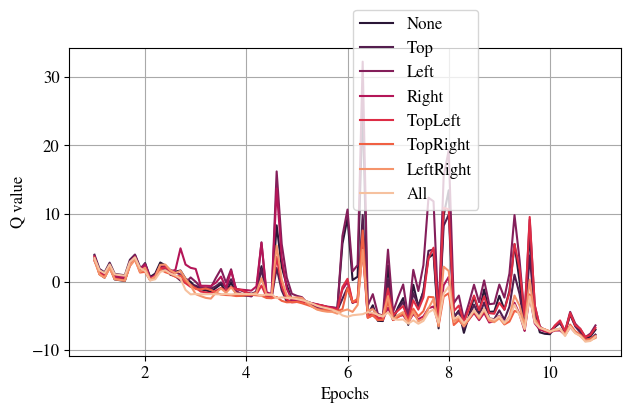

In [101]:
multi_data = [agent.q_value_data[i, :agent.data_idx] for i in range(agent.action_num)]
multi_keys = agent.action_labels

multi_linear_plot(multi_data,
                    multi_keys,
                    'Epochs',
                    'Q value',
                    10,
                    "",
                    palette="rocket")


/home/filo/thesis/pqos-correlation/corr_study/plot/linear.py:105: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=data, ax=ax, x='Time', y='Value', hue='Label', markers=True, dashes=False, ci=None, palette=palette)


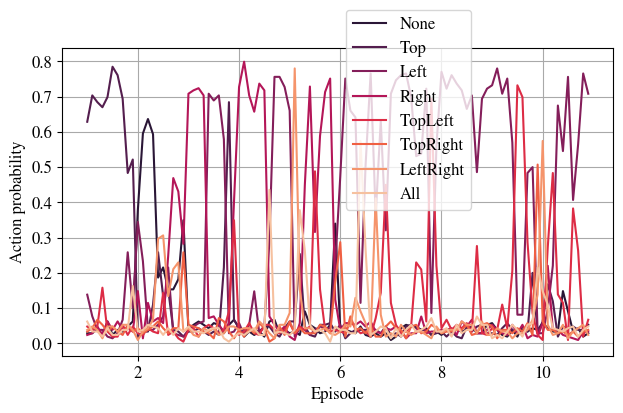

In [102]:
multi_data = [agent.action_data[i, :agent.data_idx] for i in range(agent.action_num)]
multi_keys = agent.action_labels

multi_linear_plot(multi_data,
                    multi_keys,
                    'Episode',
                    'Action probability',
                    10,
                    '',
                    palette="rocket")

In [103]:
from corr_study.simulation import *
from corr_study.datasetApi import *
sim = Simulation("Town03MediumNEW", Weather.Clear ,Time.Sunset, [Sensor.LT, Sensor.LFL, Sensor.LFR], 
                 mode=Simulation.RL_AGENT, train=False, agent=agent, alpha= 2*10**-5, verbose=False, visualize=True)
sim.length = 300
sim.simulate()

  0%|          | 0/299 [00:00<?, ?it/s]/home/filo/anaconda3/envs/pqos-correlation/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/filo/anaconda3/envs/pqos-correlation/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
100%|██████████| 299/299 [00:49<00:00,  5.98it/s]


In [96]:
np.unique(sim.transmissions[:300,:], axis=0, return_counts=True)

(array([[False, False, False],
        [False,  True, False],
        [ True,  True,  True]]),
 array([  1, 298,   1]))

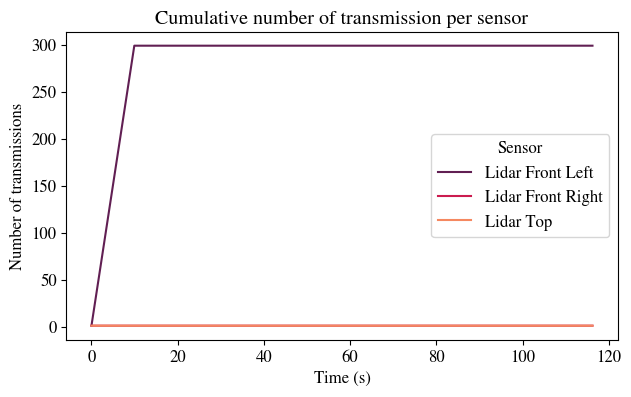

In [97]:
n_trans = np.cumsum(sim.transmissions, axis=0)

n_frames = n_trans.shape[0]

n_trans = n_trans.flatten("F")

time_istants = np.tile(np.arange(n_frames)/30, 3)

data = np.array([n_trans, time_istants])
data = data.T

sensor = ["Lidar Top",] * n_frames + ["Lidar Front Left",] * \
    n_frames + ["Lidar Front Right",] * n_frames
# sim_name = ["Low traffic",] * 3 * n_frames + ["High traffic",] * 3 * n_frames_high
df = pd.DataFrame(data, columns=["Number of transmissions", "Time (s)"])

df["Sensor"] = pd.Categorical(sensor)
# df["Simulation"] = pd.Categorical(sim_name)
fig = plt.figure()
ax = fig.add_subplot(111)
sns.lineplot(df, x="Time (s)", y="Number of transmissions",
             dashes=True, hue="Sensor", palette="rocket", errorbar=None, ax=ax)

plt.title("Cumulative number of transmission per sensor")
plt.savefig("output/latexplot/cumulative_trans_sensor_full.png")
tikzplotlib.save("output/latexplot/cumulative_trans_sensor_full.tex")
plt.show()